# Aprendizaje no supervisado

Los datos **no** están **etiquetados**. 

El objetivo es buscar elementos similares. 

**NO hay una variable objetivo a predecir**

Ejemplos:
  * Segmentación de clientes.
  * Jugadores similares del FIFA.
  * Compradores del supermercado semejantes.
  * Estaciones de BICIMAD similares.

<img width=800 src="https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Clustering

Proceso de dividir un conjunto de objetos en varios grupos, de manera que los objetos en el mismo grupo (un cluster) sean más similares entre sí que con los de otros grupos.

<img width=600 src="https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg">

### K-Means

Este algoritmo divide nuestros datos en K clusters buscando centroides y calculando distancias

Minimiza un criterio conocido como la inercia o la suma de cuadrados dentro del cluster

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [5]:
df.shape

(150, 4)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Motivación: cuál es la distancia entre la planta 0 y 1?

Motivación: está la planta 1 más cerca de la 0 o de la 2?

In [8]:
dff = df.copy()
dff["petal length (cm)"] = dff["petal length (cm)"] * 10

In [9]:
dff.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,14.0,0.2
1,4.9,3.0,14.0,0.2
2,4.7,3.2,13.0,0.2
3,4.6,3.1,15.0,0.2
4,5.0,3.6,14.0,0.2


Motivación: cuál es la distancia entre la planta 0 y 1?

Motivación: está la planta 1 más cerca de la 0 o de la 2?

Dado que KMeans se basa en la **distancia** y nuestras variables tienen magnitudes muy diferentes, 

debemos **estandarizar los datos**

In [10]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [13]:
df.mean().round(3)

sepal length (cm)   -0.0
sepal width (cm)    -0.0
petal length (cm)   -0.0
petal width (cm)    -0.0
dtype: float64

In [14]:
df.std().round(3)

sepal length (cm)    1.003
sepal width (cm)     1.003
petal length (cm)    1.003
petal width (cm)     1.003
dtype: float64

In [101]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [102]:
km = KMeans(n_clusters=3, n_init="auto")
km.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [103]:
cluster_n = km.predict(df)
cluster_n

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [105]:
km.cluster_centers_

array([[ 1.13140499,  0.07903422,  0.98537152,  0.99908828],
       [-0.06881714, -0.89339955,  0.34522179,  0.28439302],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

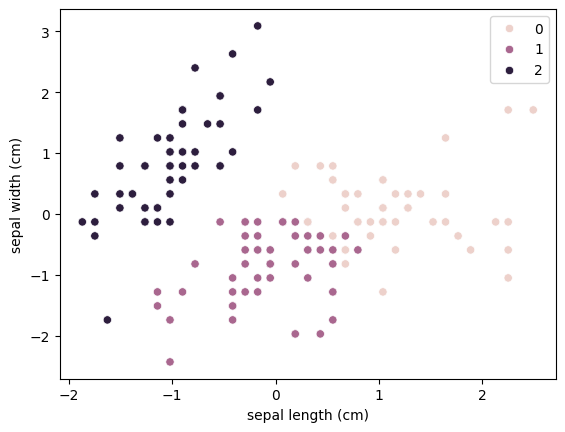

In [104]:
sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=cluster_n)

### DBSCAN

**No** definimos el número de clusters a priori

Definimos la distancia máxima de un punto a otro para que conecten. La distancia de un elemento a otro de un cluster puede ser mayor.

El número de clusters resultante dependerá de los datos.

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps=0.5)

In [36]:
dbscan.fit(df)

DBSCAN()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

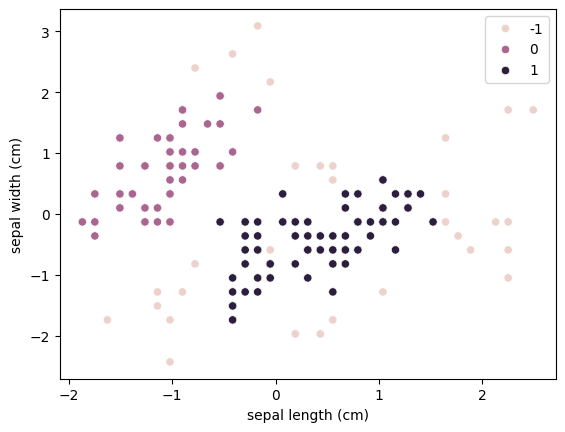

In [37]:
sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=dbscan.labels_)

### Más métodos

[sklearn documentation Clustering](https://scikit-learn.org/stable/modules/clustering.html)

<img width=600 src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

## Clustering: métricas

Una métrica mide cómo de bien clusterizados están los datos

### Silhouette Score

La Silhouette Score es una métrica de la buena separación entre clusters.

Va de -1 a 1, donde:
 - los valores negativos significan que los cluster están mal asignados y se solapan mucho
 - 0 significa que los conglomerados se solapan un poco
 - los valores positivos indican que los cluster están bien separados y definidos.

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(df, cluster_n)

0.4565352255831263

Podemos lanzar varias pruebas y ver el K óptimo

In [40]:
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(df)
    
    cluster_n = km.predict(df)
    
    score = silhouette_score(df, cluster_n)

    print(f"K={k}, score={round(score, 3)}")

K=2, score=0.582
K=3, score=0.463
K=4, score=0.415
K=5, score=0.401
K=6, score=0.327
K=7, score=0.336
K=8, score=0.302
K=9, score=0.336


Veamos el de 2 clusters

In [47]:
km = KMeans(n_clusters=2, n_init="auto")
km.fit(df)

KMeans(n_clusters=2, n_init='auto')

In [48]:
cluster_n = km.predict(df)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

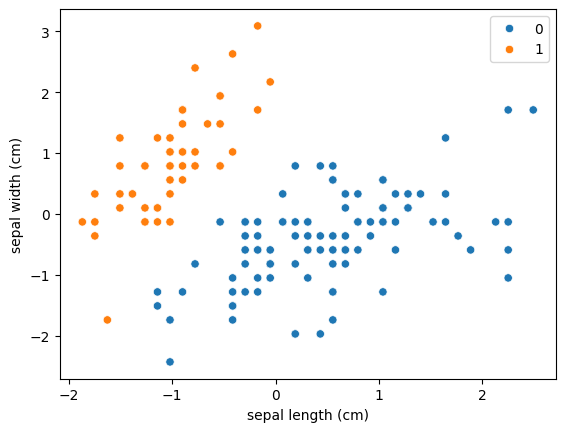

In [49]:
sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=cluster_n)

In [50]:
silhouette_score(df, dbscan.labels_)

0.3565164814270073

### Test del codo

<img width=500 src="https://www.oreilly.com/api/v2/epubs/9781788295758/files/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png">

inertia = distancia media al centro del cluster

In [51]:
inertias = []

for k in range(2, 20):
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(df)

    inertia = km.inertia_
    inertias.append(inertia)

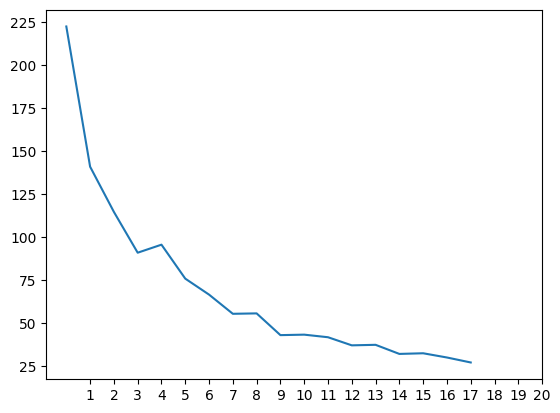

In [52]:
plt.plot(inertias)
plt.xticks(range(1,21));

## Caso de uso: tickets de supermercado

Quiero identificar tickets similares

### Preprocesado productos

In [56]:
data = pd.read_csv("./datasets/tickets_products.csv")
data["datetime"] = data["Date"] + " " + data["Time"]
data.datetime = pd.to_datetime(data.datetime)
data = data.drop(columns=["Date", "Time"])

Cada fila es un producto de un ticket (transaction)

In [57]:
data.shape

(21293, 3)

In [58]:
data.head(10)

,Transaction,Item,datetime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
5,3,Cookies,2016-10-30 10:07:57
6,4,Muffin,2016-10-30 10:08:41
7,5,Coffee,2016-10-30 10:13:03
8,5,Pastry,2016-10-30 10:13:03
9,5,Bread,2016-10-30 10:13:03


In [60]:
data.Item.nunique()

95

In [59]:
data["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

Hay muchos valores de Item diferentes, agrupémoslos en categorías

In [61]:
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

In [62]:
def category(product):
    for k, v in groups.items():
        if product in v:
            return k
            
    return "other"

In [63]:
category("Coffee")

'beverage'

In [64]:
category("Granola")

'breakfast'

In [65]:
data["category"] = data["Item"].apply(category)
data = data.drop(columns="Item")

In [66]:
data.head()

,Transaction,datetime,category
0,1,2016-10-30 09:58:11,bread
1,2,2016-10-30 10:05:34,bread
2,2,2016-10-30 10:05:34,bread
3,3,2016-10-30 10:07:57,beverage
4,3,2016-10-30 10:07:57,condiments


In [67]:
data["category"].unique()

array(['bread', 'beverage', 'condiments', 'dessert', 'breakfast_pastry',
       'other', 'kids', 'breakfast', 'lunch', 'snacks'], dtype=object)

get_dummies

In [68]:
data_orig = data.copy()

In [69]:
data.head()

,Transaction,datetime,category
0,1,2016-10-30 09:58:11,bread
1,2,2016-10-30 10:05:34,bread
2,2,2016-10-30 10:05:34,bread
3,3,2016-10-30 10:07:57,beverage
4,3,2016-10-30 10:07:57,condiments


In [70]:
data = pd.get_dummies(data, columns=["category"], prefix="type")

In [71]:
data.head()

,Transaction,datetime,type_beverage,type_bread,type_breakfast,type_breakfast_pastry,type_condiments,type_dessert,type_kids,type_lunch,type_other,type_snacks
0,1,2016-10-30 09:58:11,False,True,False,False,False,False,False,False,False,False
1,2,2016-10-30 10:05:34,False,True,False,False,False,False,False,False,False,False
2,2,2016-10-30 10:05:34,False,True,False,False,False,False,False,False,False,False
3,3,2016-10-30 10:07:57,True,False,False,False,False,False,False,False,False,False
4,3,2016-10-30 10:07:57,False,False,False,False,True,False,False,False,False,False


In [72]:
data.shape

(21293, 12)

### Agrupando por ticket

In [73]:
data.head()

,Transaction,datetime,type_beverage,type_bread,type_breakfast,type_breakfast_pastry,type_condiments,type_dessert,type_kids,type_lunch,type_other,type_snacks
0,1,2016-10-30 09:58:11,False,True,False,False,False,False,False,False,False,False
1,2,2016-10-30 10:05:34,False,True,False,False,False,False,False,False,False,False
2,2,2016-10-30 10:05:34,False,True,False,False,False,False,False,False,False,False
3,3,2016-10-30 10:07:57,True,False,False,False,False,False,False,False,False,False
4,3,2016-10-30 10:07:57,False,False,False,False,True,False,False,False,False,False


Sin tener en cuenta la fecha...

In [74]:
tickets = data.drop("datetime", axis=1).groupby("Transaction").sum()

In [75]:
tickets.shape

(9531, 10)

In [76]:
tickets.head()

,type_beverage,type_bread,type_breakfast,type_breakfast_pastry,type_condiments,type_dessert,type_kids,type_lunch,type_other,type_snacks
Transaction,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0


### KMeans

Encontremos tickets similares

In [77]:
km = KMeans(n_clusters=3, n_init="auto")

In [78]:
km.fit(tickets)

KMeans(n_clusters=3, n_init='auto')

In [79]:
km.labels_

array([0, 0, 2, ..., 1, 2, 2], dtype=int32)

In [80]:
silhouette_score(tickets, km.labels_)

0.2720423409926562

In [ ]:
data_orig.head()

In [81]:
cluster_n = pd.Series(km.labels_, index=tickets.index)

In [82]:
data_orig["cluster_n"] = data_orig.Transaction.map(cluster_n)

In [83]:
data_orig.head()

,Transaction,datetime,category,cluster_n
0,1,2016-10-30 09:58:11,bread,0
1,2,2016-10-30 10:05:34,bread,0
2,2,2016-10-30 10:05:34,bread,0
3,3,2016-10-30 10:07:57,beverage,2
4,3,2016-10-30 10:07:57,condiments,2


In [84]:
pd.crosstab(data_orig.category, data_orig.cluster_n)

cluster_n,0,1,2
category,,,
beverage,985,4308,2970
bread,3592,527,7
breakfast,50,42,68
breakfast_pastry,567,617,985
condiments,62,41,117
dessert,577,922,1302
kids,12,12,23
lunch,231,443,662
other,432,577,1113


<Axes: xlabel='cluster_n', ylabel='category'>

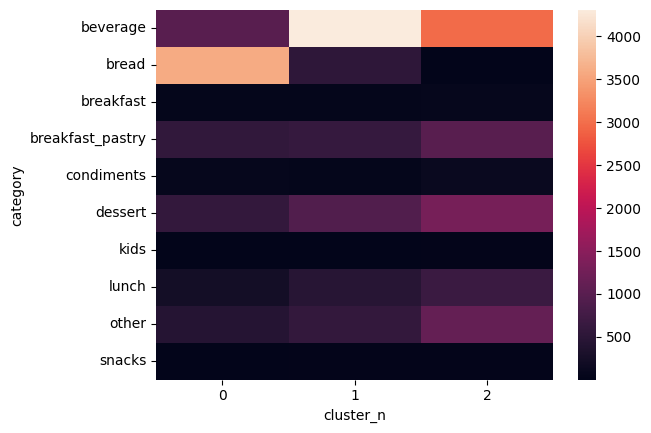

In [85]:
sns.heatmap(pd.crosstab(data_orig.category, data_orig.cluster_n))

En la división anterior no hay grupos claramente diferenciados

Probemos a utilizar datos de tiempo!

### KMeans incluyendo date time

In [86]:
transaction_dates = data.groupby("Transaction").datetime.first()
tickets["hour"] = transaction_dates.dt.hour
tickets["day"] = transaction_dates.dt.dayofweek

In [87]:
tickets.head()

,type_beverage,type_bread,type_breakfast,type_breakfast_pastry,type_condiments,type_dessert,type_kids,type_lunch,type_other,type_snacks,hour,day
Transaction,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,9,6
2,0,2,0,0,0,0,0,0,0,0,10,6
3,1,0,0,0,1,1,0,0,0,0,10,6
4,0,0,0,1,0,0,0,0,0,0,10,6
5,1,1,0,1,0,0,0,0,0,0,10,6


In [88]:
km = KMeans(n_clusters=4, n_init="auto")

In [89]:
km.fit(tickets)

KMeans(n_clusters=4, n_init='auto')

In [90]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [91]:
silhouette_score(tickets, km.labels_)

0.27929526744105615

In [92]:
data_orig.head()

,Transaction,datetime,category,cluster_n
0,1,2016-10-30 09:58:11,bread,0
1,2,2016-10-30 10:05:34,bread,0
2,2,2016-10-30 10:05:34,bread,0
3,3,2016-10-30 10:07:57,beverage,2
4,3,2016-10-30 10:07:57,condiments,2


In [93]:
cluster_n = pd.Series(km.labels_, index=tickets.index)

In [94]:
data_orig["cluster_n"] = data_orig.Transaction.map(cluster_n)

In [95]:
data_orig["day"] = data_orig.datetime.dt.weekday
data_orig["hour"] = data_orig.datetime.dt.hour

In [96]:
pd.crosstab(data_orig.day, data_orig.cluster_n)

cluster_n,0,1,2,3
day,,,,
0,0,1082,0,1312
1,0,1165,0,1315
2,0,1152,0,1277
3,0,1247,1472,0
4,1426,0,1809,0
5,2088,0,2715,0
6,1393,0,1840,0


<Axes: xlabel='cluster_n', ylabel='day'>

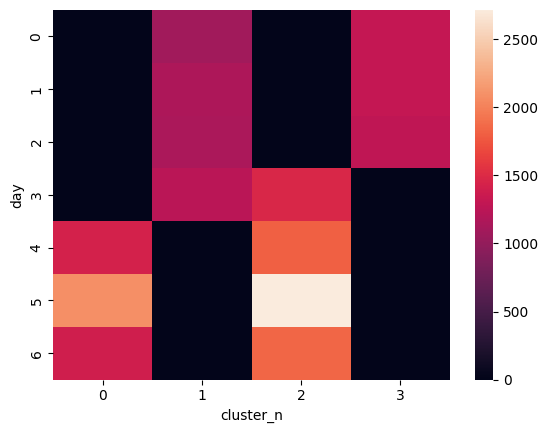

In [97]:
sns.heatmap(pd.crosstab(data_orig.day, data_orig.cluster_n))

In [99]:
pd.crosstab(data_orig.hour, data_orig.cluster_n)

cluster_n,0,1,2,3
hour,,,,
1,0,0,1,0
7,0,0,9,16
8,0,0,431,238
9,0,0,1337,708
10,0,0,1854,909
11,0,0,2246,970
12,0,0,1958,1063
13,1478,1298,0,0
14,1435,1301,0,0


<Axes: xlabel='cluster_n', ylabel='hour'>

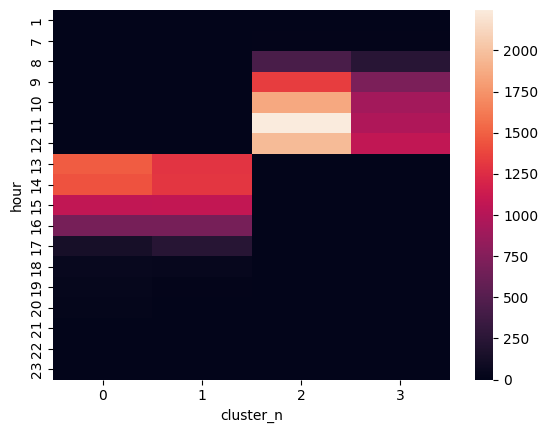

In [100]:
sns.heatmap(pd.crosstab(data_orig.hour, data_orig.cluster_n))